In [110]:
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
import numpy as np
from matplotlib import pyplot as plt

### Generate synthetic data

In [111]:
def r(x): return 0.5*x*np.cos(4*np.pi*x)

np.random.seed(666)
n = 50

X = np.random.uniform(size=n)
y = r(X) + 0.1*np.random.normal(size=n)
x = np.arange(0, 1, 0.01)

### Plot $k$-NN regression for $k=2, 4, 6, 8$

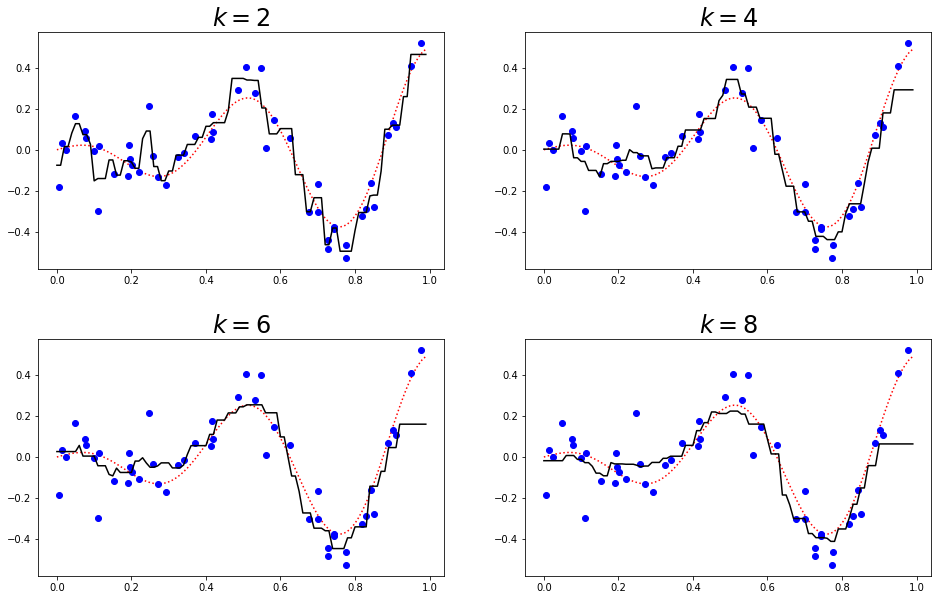

In [112]:
f, axes = plt.subplots(2, 2, figsize=(16, 10))
f.subplots_adjust(hspace=0.3)
axes = np.concatenate(axes)

for j in range(4):
    k = 2*(j + 1)
    R = KNeighborsRegressor(n_neighbors=k)
    R.fit(X.reshape(-1, 1), y)
    y_ = R.predict(x.reshape(-1, 1))
    ax = axes[j]
    ax.set_title(f"$k={k}$", fontsize=24)
    ax.plot(x, r(x), 'r:')
    ax.plot(X, y, 'bo')
    ax.plot(x, y_, 'k')
    
f.savefig("knn_four_plots_1.pdf", bbox_inches='tight')

### Plot $k$-NN regression for $k=10, 12, 14, 16$

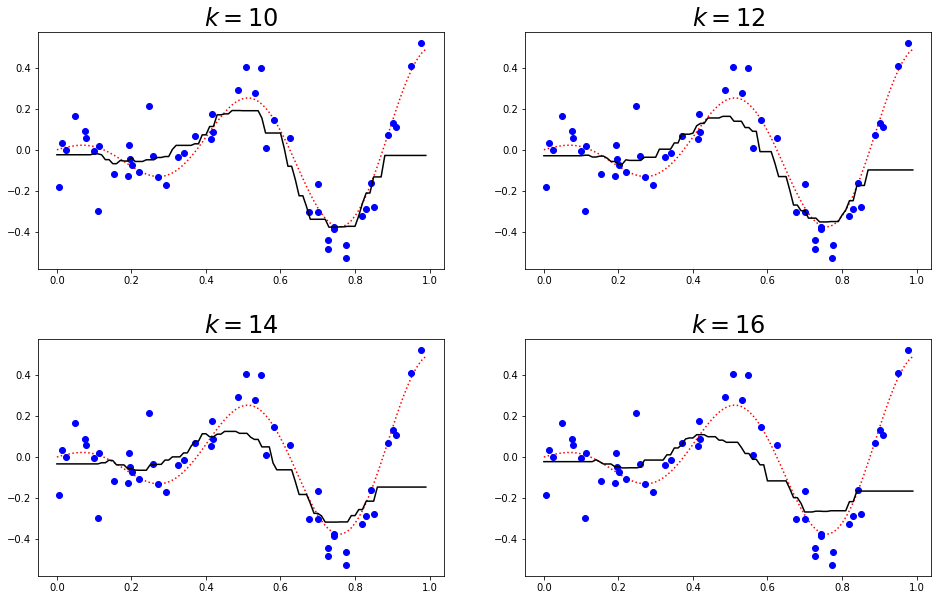

In [113]:
f, axes = plt.subplots(2, 2, figsize=(16, 10))
f.subplots_adjust(hspace=0.3)
axes = np.concatenate(axes)

for j in range(4):
    k = 2*(j + 5)
    R = KNeighborsRegressor(n_neighbors=k)
    R.fit(X.reshape(-1, 1), y)
    y_ = R.predict(x.reshape(-1, 1))
    ax = axes[j]
    ax.set_title(f"$k={k}$", fontsize=24)
    ax.plot(x, r(x), 'r:')
    ax.plot(X, y, 'bo')
    ax.plot(x, y_, 'k')
    
f.savefig("knn_four_plots_2.pdf", bbox_inches='tight')

### Local average regression, $h=0.025, 0.050, 0.075, 0.100$

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


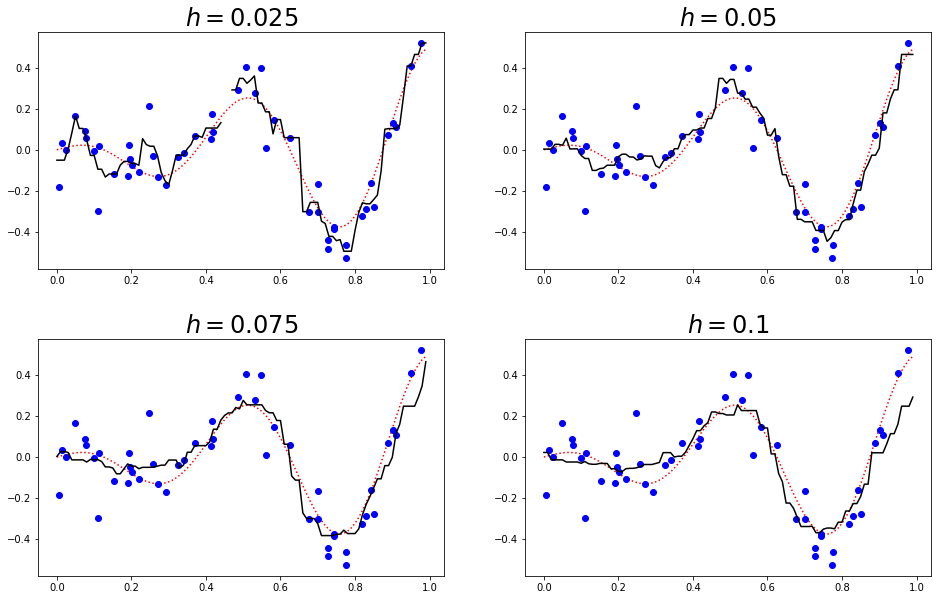

In [114]:
f, axes = plt.subplots(2, 2, figsize=(16, 10))
f.subplots_adjust(hspace=0.3)
axes = np.concatenate(axes)

for j in range(4):
    radius = 0.025*(j + 1)
    R = RadiusNeighborsRegressor(radius=radius)
    R.fit(X.reshape(-1, 1), y)
    y_ = R.predict(x.reshape(-1, 1))
    ax = axes[j]
    ax.set_title(f"$h={radius:.03}$", fontsize=24)
    ax.plot(x, r(x), 'r:')
    ax.plot(X, y, 'bo')
    ax.plot(x, y_, 'k')
    
f.savefig("la_four_plots_1.pdf", bbox_inches='tight')

### Local average regression, $h=0.125, 0.150, 0.175, 0.200$

0.125
0.15000000000000002
0.17500000000000002
0.2


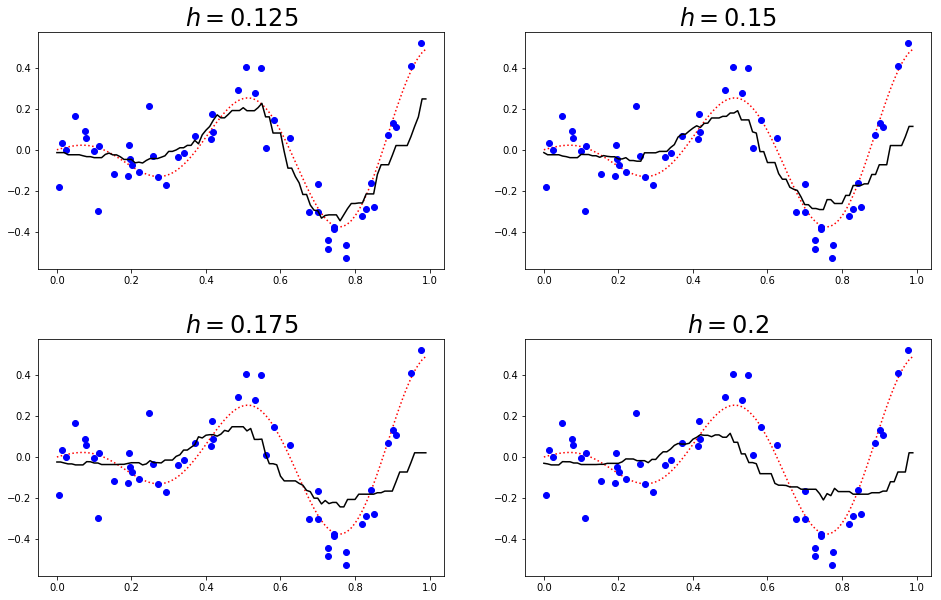

In [115]:
f, axes = plt.subplots(2, 2, figsize=(16, 10))
f.subplots_adjust(hspace=0.3)
axes = np.concatenate(axes)

for j in range(4):
    radius = 0.025*(j + 5)
    R = RadiusNeighborsRegressor(radius=radius)
    R.fit(X.reshape(-1, 1), y)
    y_ = R.predict(x.reshape(-1, 1))
    ax = axes[j]
    print(radius)
    ax.set_title(f"$h={radius:.03}$", fontsize=24)
    ax.plot(x, r(x), 'r:')
    ax.plot(X, y, 'bo')
    ax.plot(x, y_, 'k')
    
f.savefig("la_four_plots_2.pdf", bbox_inches='tight')

### Variance and bias

In [204]:
def r(x): return 0.5*x*np.cos(4*np.pi*x)

np.random.seed(666)
n = 50

X = np.random.uniform(size=n)
x = np.arange(0, 1, 0.01)
rx = r(x)

N = 1000
vs = []
bs = []

se = []

for k in range(1, 21):
    R = KNeighborsRegressor(n_neighbors=k)
    Yk = []
    sek = []
    for j in range(N):
        y = r(X) + 0.1*np.random.normal(size=n)
        R.fit(X.reshape(-1, 1), y)
        r_ = R.predict(x.reshape(-1, 1))
        sek.append((rx - r_)**2)
    sek = np.array(sek)
    se.append(np.mean(sek, axis=0))
se = np.array(se)

In [205]:
se.shape

(20, 100)

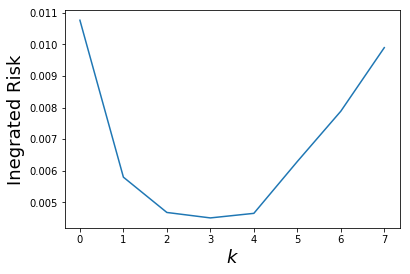

In [223]:
plt.xlabel("$k$", fontsize=18)
plt.ylabel("Inegrated Risk", fontsize=18)
plt.plot(np.mean(se, axis=1)[:8])
# plt.title("Integrated Risk vs $k$", fontsize=24)
plt.show()


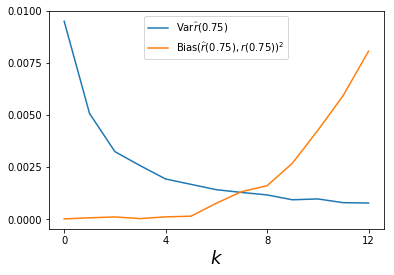

<Figure size 432x288 with 0 Axes>

In [276]:
def r(x): return 0.5*x*np.cos(4*np.pi*x)

np.random.seed(666)
n = 50

X = np.random.uniform(size=n)
x = np.arange(0.7, 0.8, 0.01)
rx = r(x)

N = 1000
vs = []
bs = []

for k in range(1, 21):
    R = KNeighborsRegressor(n_neighbors=k)
    Yk = []
    bsk = []
    r_sk = []
    for j in range(N):
        y = r(X) + 0.1*np.random.normal(size=n)
        R.fit(X.reshape(-1, 1), y)
        r_ = R.predict(x.reshape(-1, 1))
        r_sk.append(r_) 
        bsk.append(r_ - rx)
    bsk = np.array(bsk)
    vs.append(np.var(r_sk, axis=0))
    bs.append(np.mean(bsk, axis=0))
bs = np.array(bs)
vs = np.array(vs)
plt.xticks([0, 4, 8, 12])
plt.yticks([0, 0.0025, 0.0050, 0.0075, 0.010])
plt.plot(vs[:13,6], label="Var$\widehat{r}(0.75)$")
plt.plot(bs[:13,6]**2, label="Bias$(\widehat{r}(0.75), r(0.75))^2$")
plt.xlabel("$k$", fontsize=18)
plt.legend()
plt.show()
plt.savefig("bias_variance_2.pdf", bbox_inches='tight')

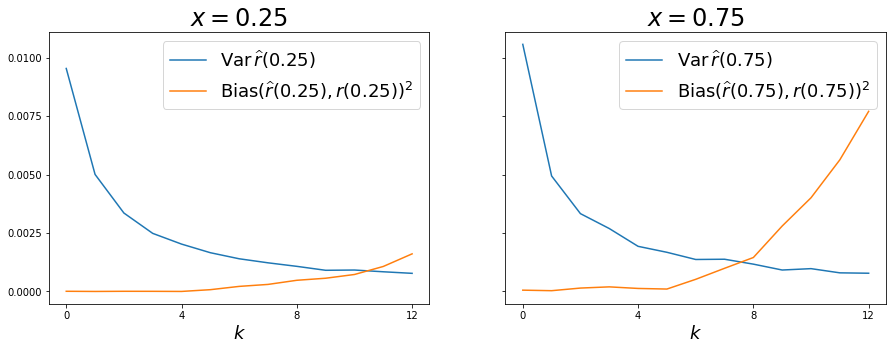

In [295]:
def r(x): return 0.5*x*np.cos(4*np.pi*x)

np.random.seed(666)
n = 50

X = np.random.uniform(size=n)
x = np.arange(0, 1, 0.01)
rx = r(x)

N = 1000
vs = []
bs = []

for k in range(1, 21):
    R = KNeighborsRegressor(n_neighbors=k)
    Yk = []
    bsk = []
    r_sk = []
    for j in range(N):
        y = r(X) + 0.1*np.random.normal(size=n)
        R.fit(X.reshape(-1, 1), y)
        r_ = R.predict(x.reshape(-1, 1))
        r_sk.append(r_) 
        bsk.append(r_ - rx)
    bsk = np.array(bsk)
    vs.append(np.var(r_sk, axis=0))
    bs.append(np.mean(bsk, axis=0))
bs = np.array(bs)
vs = np.array(vs)


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex=True)
# f.subplots_adjust(hspace=0.3)

ax1.set_title("$x=0.25$", fontsize=24)
ax1.set_xticks([0, 4, 8, 12])
ax1.set_yticks([0, 0.0025, 0.0050, 0.0075, 0.010])
ax1.plot(vs[:13,25], label="Var$\,\widehat{r}(0.25)$")
ax1.plot(bs[:13,25]**2, label="Bias$(\widehat{r}(0.25), r(0.25))^2$")
ax1.set_xlabel("$k$", fontsize=18)
ax1.legend(fontsize=18)

ax2.set_title("$x=0.75$", fontsize=24)
ax2.set_xticks([0, 4, 8, 12])
ax2.set_yticks([0, 0.0025, 0.0050, 0.0075, 0.010])
ax2.plot(vs[:13,75], label="Var$\,\widehat{r}(0.75)$")
ax2.plot(bs[:13,75]**2, label="Bias$(\widehat{r}(0.75), r(0.75))^2$")
ax2.set_xlabel("$k$", fontsize=18)
ax2.legend(fontsize=18)

f.savefig("bias_variance.pdf", bbox_inches='tight')

In [296]:
R.score?